In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# 2. Load the Dataset
laptop_prices = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\laptop_prices.csv")
laptop_prices.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [9]:
# 3. Check Missing Values
laptop_prices.isnull().sum()


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [12]:
# 4. Remove Duplicates
laptop_prices = laptop_prices.drop_duplicates()

In [16]:
# 5. Convert RAM & Weight
laptop_prices['Ram'] = laptop_prices['Ram'].astype(str).str.replace('GB','').astype(int)
laptop_prices['Weight'] = laptop_prices['Weight'].astype(str).str.replace('kg','').astype(float)

In [18]:
# 6. Encoding Categorical Data
categorical_cols = [
    'Company','TypeName','OS','Screen',
    'CPU_company','CPU_model',
    'PrimaryStorageType','SecondaryStorageType',
    'GPU_company','GPU_model'
]

laptop_prices = pd.get_dummies(laptop_prices, columns=categorical_cols, drop_first=True)

In [19]:
# 7. Feature Selection
X = laptop_prices.drop('Price_euros', axis=1)
y = laptop_prices['Price_euros']

In [23]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# 9. Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# 10. Prediction
y_pred = model.predict(X_test)

In [33]:
# 11. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
#Lower RMSE → Better prediction accuracy
#R² close to 1 → Strong model performance

MSE: 95379.17976146375
RMSE: 308.8351983849376
R² Score: 0.8078347118398974


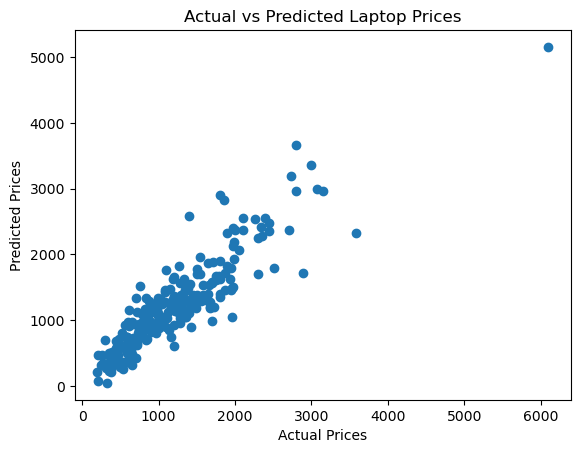

In [34]:
# 12. Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

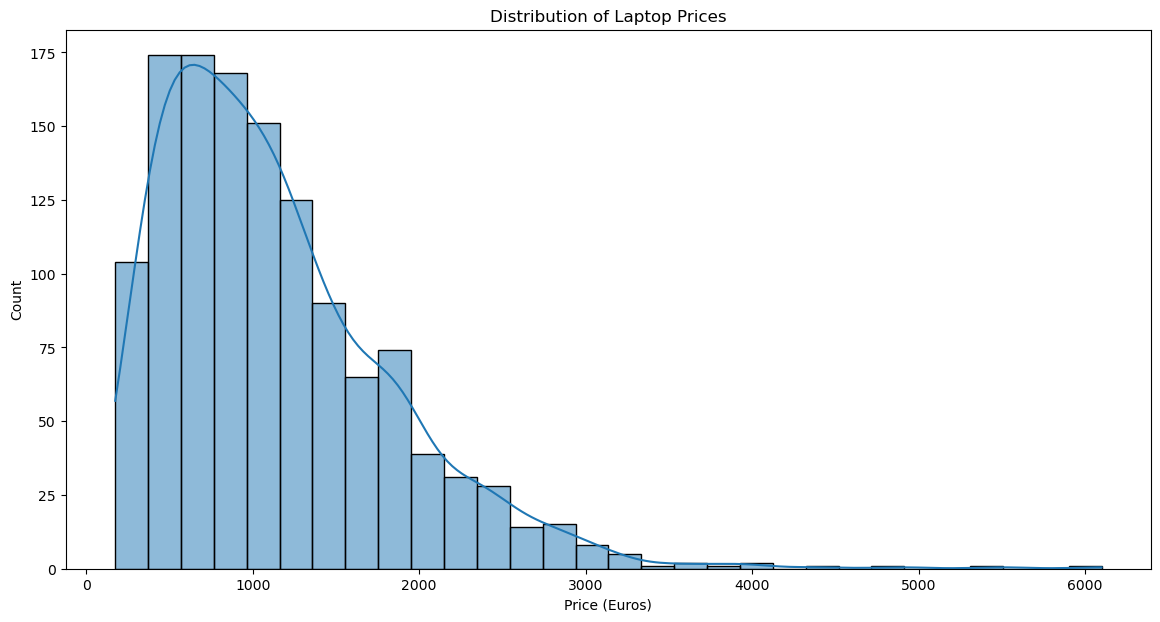

In [36]:
# 13. Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.histplot(laptop_prices['Price_euros'], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

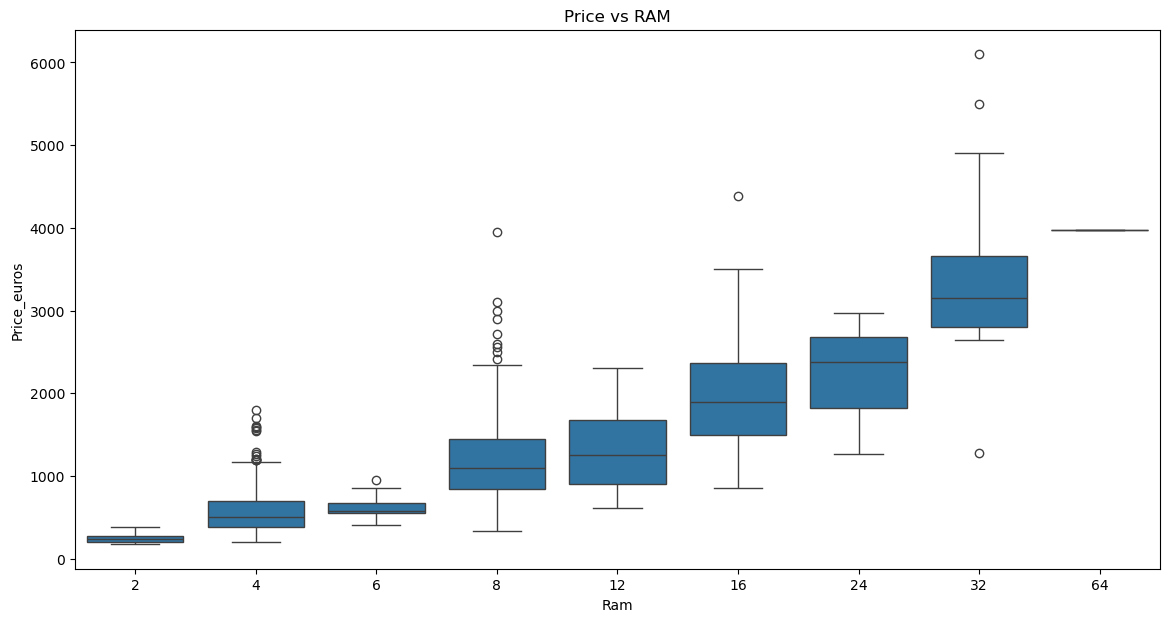

In [38]:
# 14. Price vs RAM
plt.figure(figsize=(14,7))
sns.boxplot(x='Ram', y='Price_euros', data=laptop_prices)
plt.title("Price vs RAM")
plt.show()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt   

In [54]:
print(laptop_prices.columns)


Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW',
       'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       ...
       'GPU_model_Radeon R7 M440', 'GPU_model_Radeon R7 M445',
       'GPU_model_Radeon R7 M460', 'GPU_model_Radeon R7 M465',
       'GPU_model_Radeon R9 M385', 'GPU_model_Radeon RX 540',
       'GPU_model_Radeon RX 550', 'GPU_model_Radeon RX 560',
       'GPU_model_Radeon RX 580', 'GPU_model_UHD Graphics 620'],
      dtype='object', length=259)


In [59]:
laptop_prices['Company'] = laptop_prices['Product'].str.split().str[0]


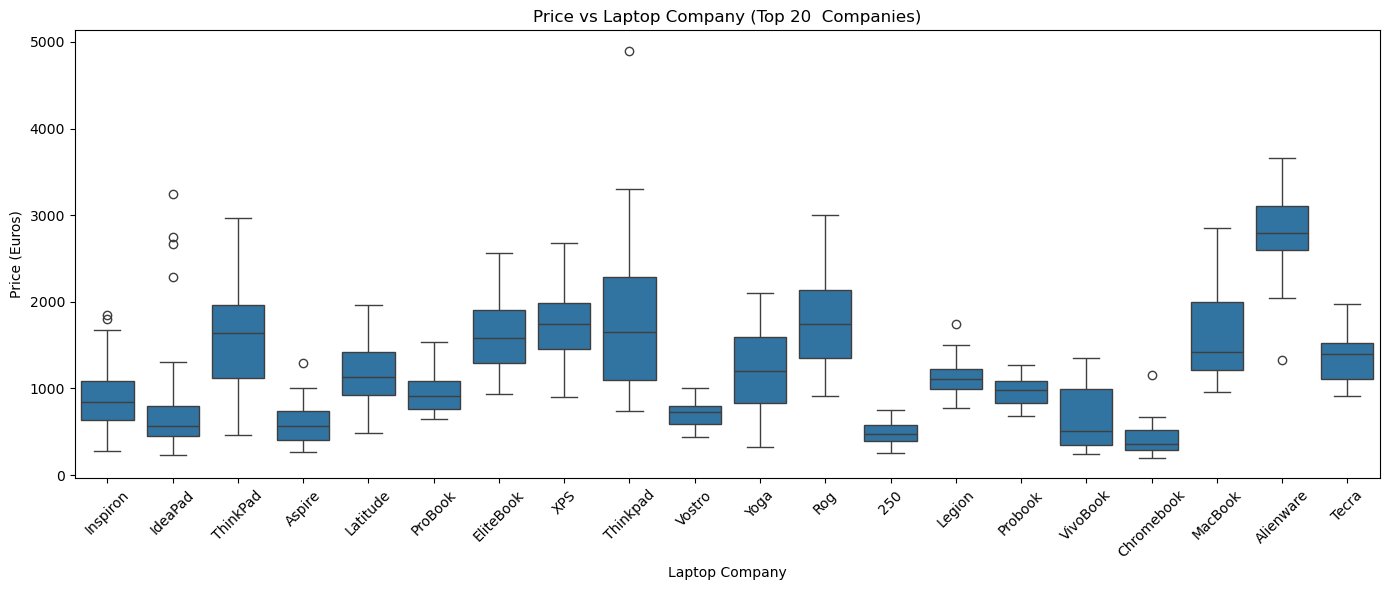

In [85]:
          
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Define filtered_data (top 10 companies by count)
top_companies = laptop_prices['Company'].value_counts().nlargest(10).index.tolist()  # list of top 10 companies
filtered_data = laptop_prices[laptop_prices['Company'].isin(top_companies)]  # filter DataFrame to only include top companies

# Plot
plt.figure(figsize=(14,6))
sns.boxplot(
    x='Company',
    y='Price_euros',
    data=filtered_data,
    order=top_companies
)

plt.xticks(rotation=45)
plt.xlabel("Laptop Company")
plt.ylabel("Price (Euros)")
plt.title("Price vs Laptop Company (Top 10  Companies)")
plt.tight_layout()
plt.show()


